<a href="https://colab.research.google.com/github/faithmakau85-jpg/Air-Quality-Prediction/blob/main/GROUP_6_AIR_QUALITY1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
import pandas as pd

df = pd.read_excel(filename)
print(df)

In [ ]:
from google.colab import files
uploaded=files.upload()
import pandas as pd

df = pd.read_excel(r"global air pollution dataset.csv.xlsx")
df.head(10001)

KeyboardInterrupt: 

In [ ]:
# Basic information about the dataset
df.info()

# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
Rows: 23463, Columns: 12


In [ ]:
# Count missing values
print("Missing values per column:")
print(df.head(10001).isnull().sum())

#Checking the data types
print("\nData types:")
print(df.head(10001).dtypes)

Missing values per column:
Country               178
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

Data types:
Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object


In [ ]:
#Checking for incorrect data types for categorical data
df.select_dtypes(include='object').head(10001)

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,Russian Federation,Praskoveya,Moderate,Good,Good,Good,Moderate
1,Brazil,Presidente Dutra,Good,Good,Good,Good,Good
2,Italy,Priolo Gargallo,Moderate,Good,Good,Good,Moderate
3,Poland,Przasnysz,Good,Good,Good,Good,Good
4,France,Punaauia,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...
9996,United States of America,Bradley,Good,Good,Good,Good,Good
9997,Cameroon,Buea,Moderate,Good,Good,Good,Moderate
9998,India,Buguda,Unhealthy,Good,Good,Good,Unhealthy
9999,Germany,Buhl,Moderate,Good,Good,Good,Moderate


In [ ]:
#Checking for incorrect data types for numerical data
df.select_dtypes(include="int64").head(10001)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6
...,...,...,...,...,...
9996,41,1,30,7,41
9997,89,3,20,1,89
9998,166,1,40,0,166
9999,66,1,24,3,66


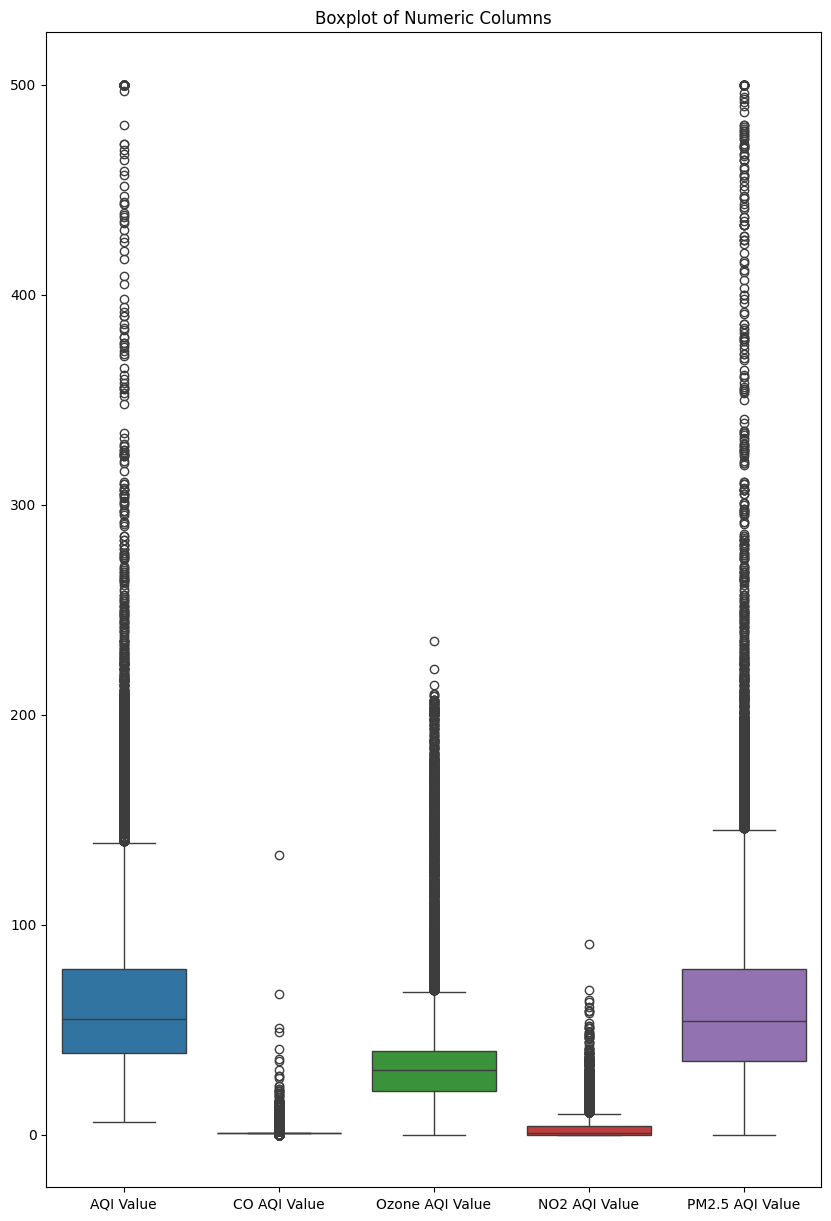

In [ ]:
#Checking for outliers using a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,15))
sns.boxplot(data=df)
plt.title("Boxplot of Numeric Columns")
plt.show()

In [ ]:
#Handling missing values
#Filling in the missing values using their mode
df["Country"]=df["Country"].fillna(df["Country"].mode()[0])
df["City"]=df["City"].fillna(df["City"].mode()[0])
df.isna().sum() #Checks whether the missing values were filled


,0
Country,0
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


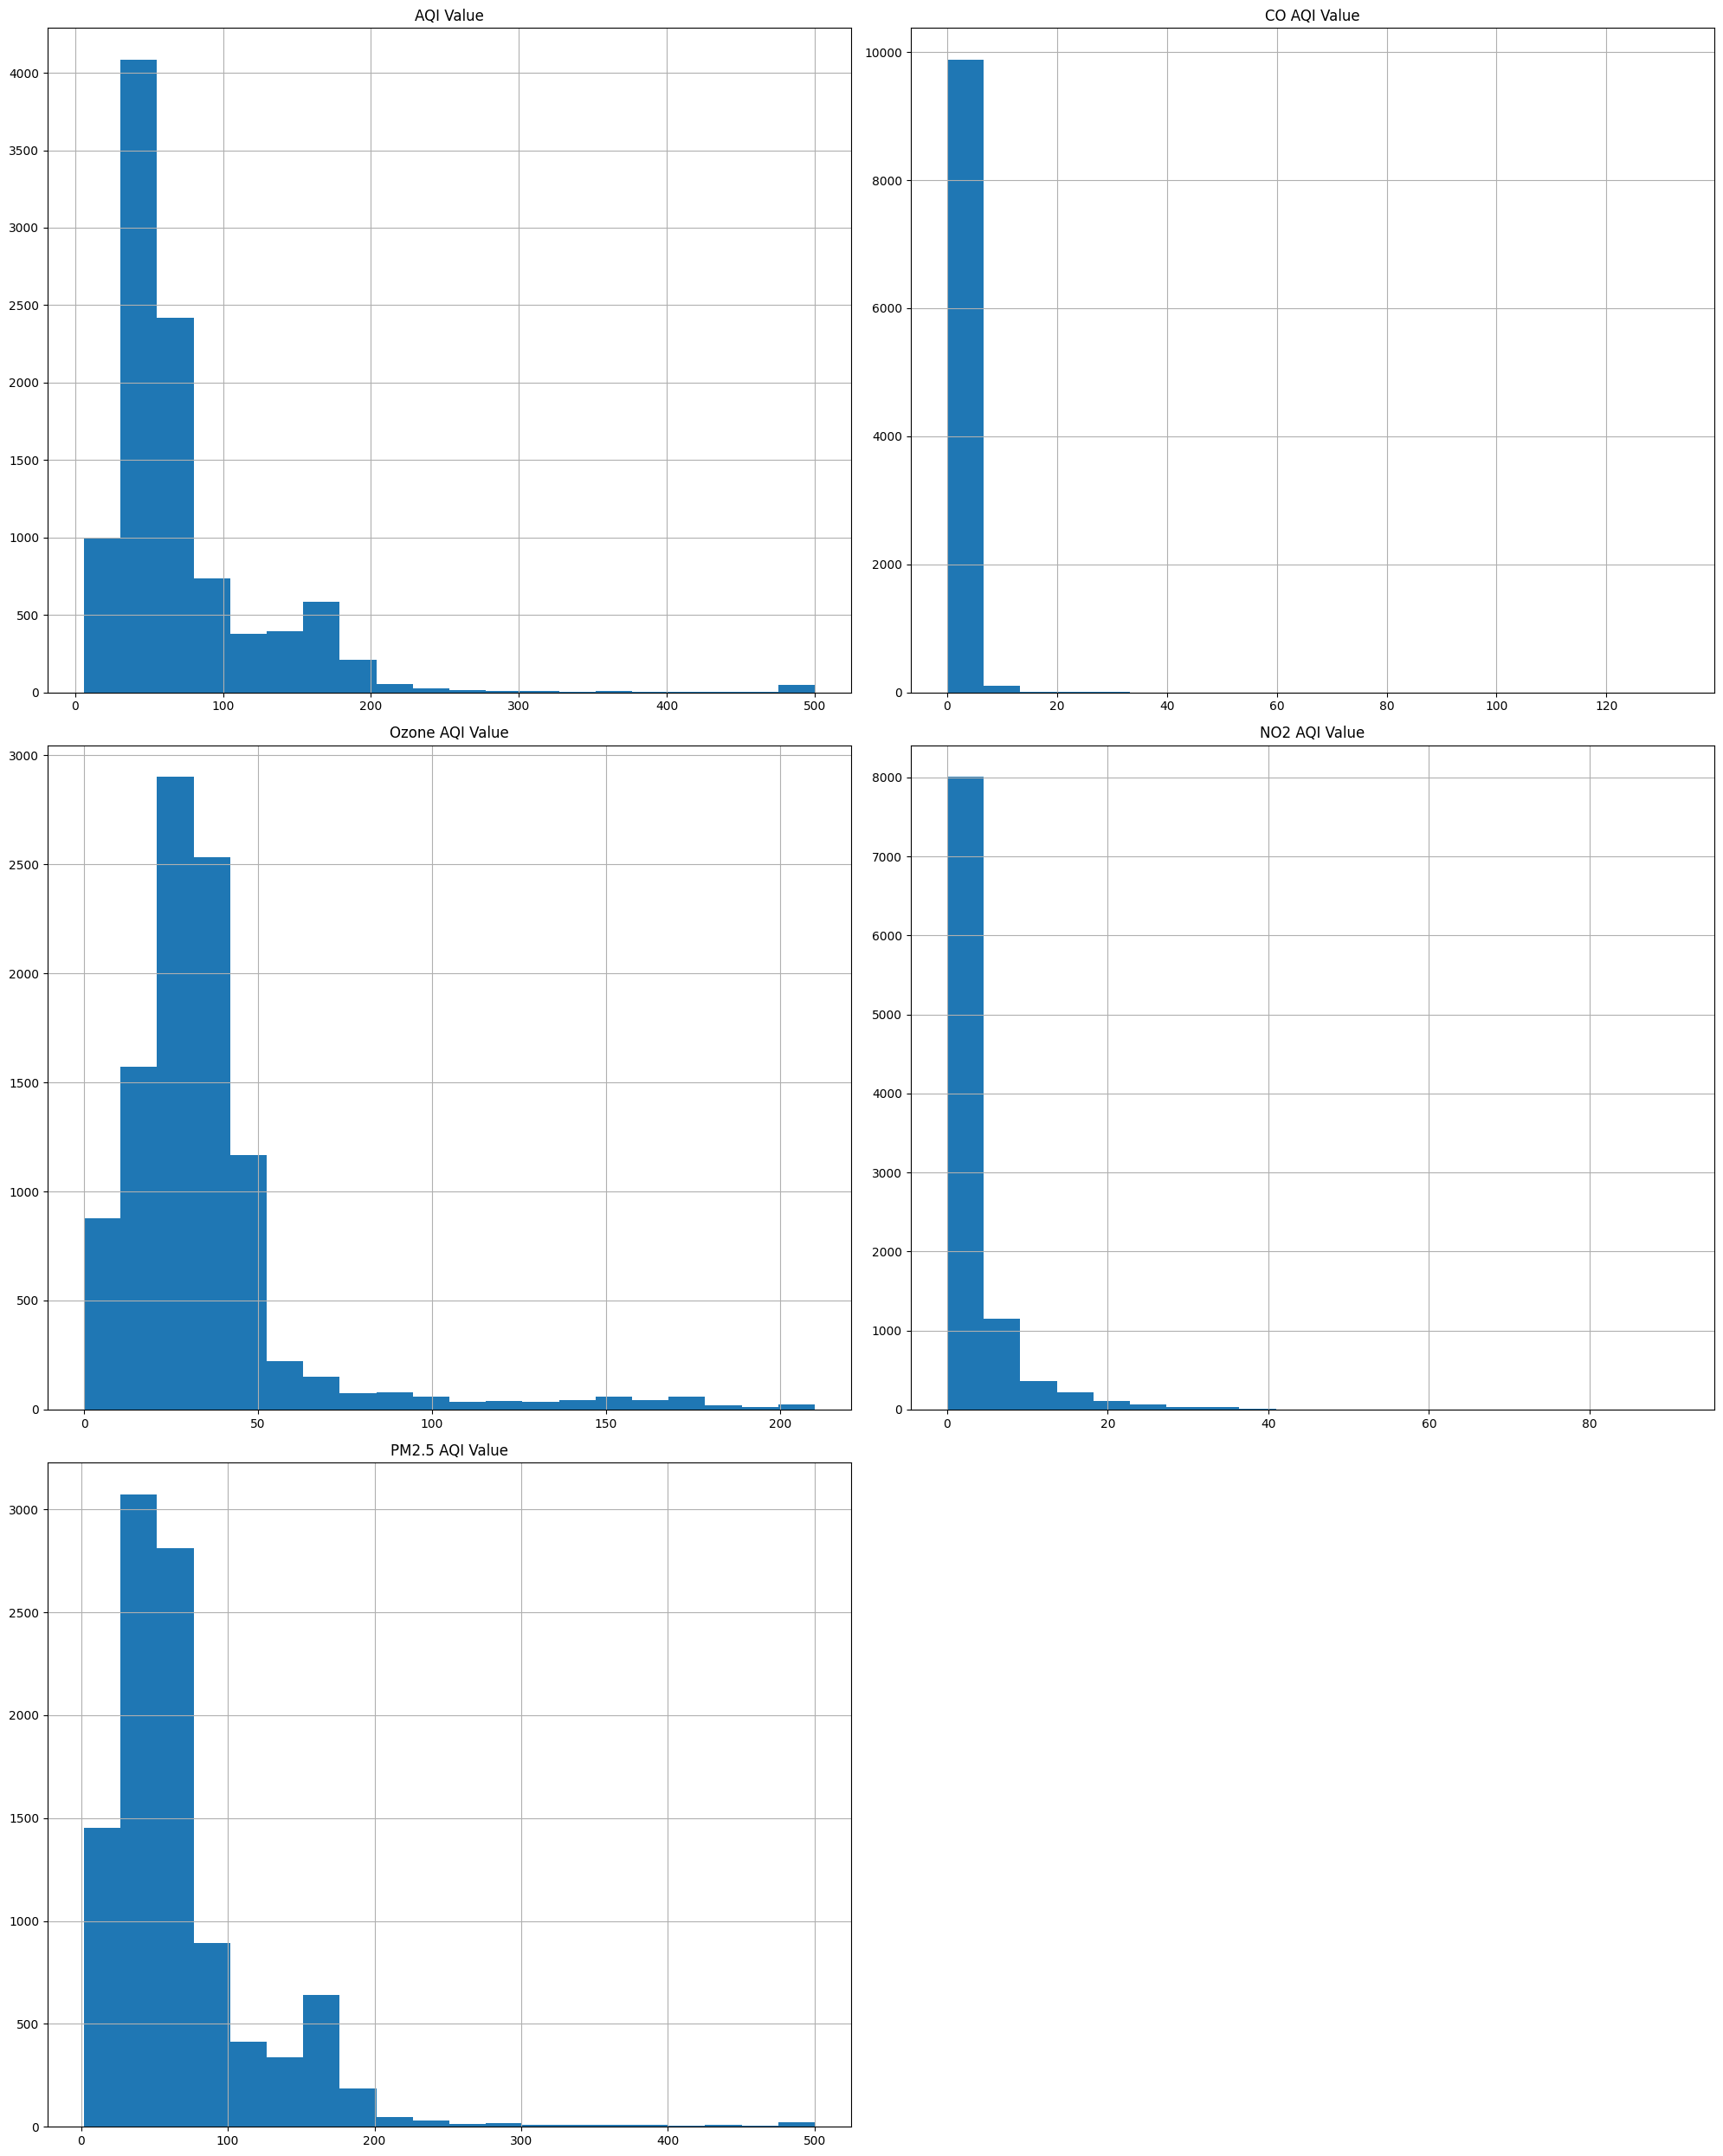

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric features
df.head(10001).hist(figsize=(20,25), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
# Install required packages if missing (uncomment pip line if needed)
# !pip install pandas numpy scikit-learn python-docx openpyxl statsmodels

import sys, os, warnings
warnings.filterwarnings("ignore")
from pathlib import Path
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
print('Imports OK')


Imports OK


In [ ]:
# Auto-detect dataset file. Searches common locations and filename keywords.
from pathlib import Path
import sys
possible_names = [
    'global air pollution dataset.csv.xlsx',
    'global air pollution dataset.xlsx',
    'global air pollution dataset.csv',
    'global_air_pollution_dataset.xlsx',
    'global_air_pollution_dataset.csv',
    'global_air_pollution_dataset.csv.xlsx'
]
search_paths = [Path.cwd(), Path('/mnt/data'), Path('/content'), Path.home()]
found_path = None
for p in search_paths:
    for name in possible_names:
        candidate = p / name
        if candidate.exists():
            found_path = candidate
            break
    if found_path:
        break
if not found_path:
    keywords = ['air','pollution','aqi','air_quality','global']
    for p in search_paths:
        for ext in ('*.xlsx','*.xls','*.csv'):
            for f in p.glob(ext):
                if any(k in f.name.lower() for k in keywords):
                    found_path = f
                    break
            if found_path: break
        if found_path: break

in_colab = 'google.colab' in sys.modules
if found_path:
    print('Auto-detected dataset:', found_path)
else:
    if in_colab:
        print('Running in Colab and no file found. Please upload using files.upload() in the next cell.')
    else:
        print('No dataset auto-detected. Please place the file in the notebook folder or set INPUT_PATH in the next cell.')

Auto-detected dataset: /content/global air pollution dataset.csv.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving global air pollution dataset.csv.xlsx to global air pollution dataset.csv (1).xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)

df.head()


Saving global air pollution dataset.csv (1).xlsx to global air pollution dataset.csv (1).xlsx


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


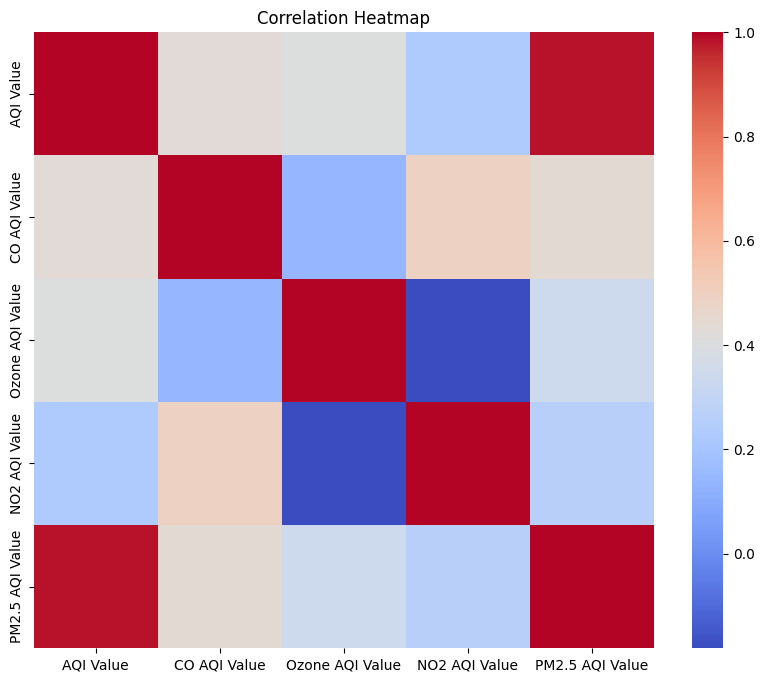

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


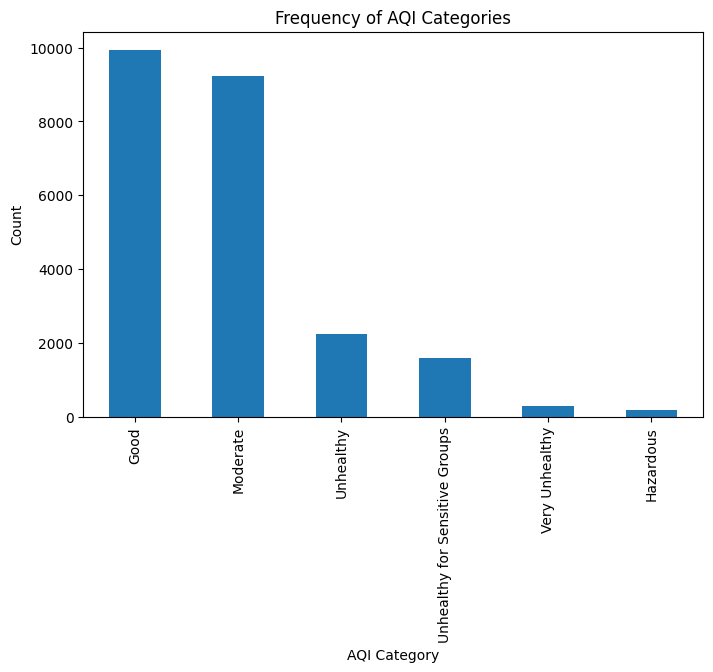

In [ ]:
import matplotlib.pyplot as plt

df['AQI Category'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title("Frequency of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()


In [ ]:
# If not auto-detected, set INPUT_PATH manually or upload (Colab).
from pathlib import Path
INPUT_PATH = None  # <-- set path here if auto-detection failed

if INPUT_PATH is None:
    # try to reuse previously auto-detected path variable if present
    try:
        if 'found_path' in globals() and found_path is not None:
            INPUT_PATH = found_path
            print('Using auto-detected file:', INPUT_PATH)
        else:
            print('No INPUT_PATH set. Set INPUT_PATH to your dataset path (e.g., Path("/path/to/file.xlsx")).')
    except Exception:
        print('No INPUT_PATH set. Set INPUT_PATH to your dataset path.')
else:
    INPUT_PATH = Path(INPUT_PATH)
    print('Using user-specified INPUT_PATH:', INPUT_PATH)

Using auto-detected file: /content/global air pollution dataset.csv.xlsx


In [ ]:
#  Week 3 pipeline (Google Colab version)

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import zipfile

#  GOOGLE COLAB FILE UPLOAD
from google.colab import files
uploaded = files.upload()

# Read uploaded file
filename = list(uploaded.keys())[0]
INPUT_PATH = Path('/content') / filename


# ===== OUTPUT FOLDER =====
OUT_DIR = Path('/content/week3_submission')
OUT_DIR.mkdir(parents=True, exist_ok=True)

PROCESSED_CSV = OUT_DIR / (Path(INPUT_PATH).stem + '_week3_processed.csv')
ZIP_FILE = OUT_DIR / 'Week3_AirQuality_Submission.zip'


# ===== FUNCTIONS =====
def find_pollutant_value_cols(columns):
    candidates = [c for c in columns if 'AQI Value' in c]
    alt = {'co aqi value','ozone aqi value','no2 aqi value','pm2.5 aqi value','pm10 aqi value'}
    alt_found = [c for c in columns if c.lower().strip() in alt]
    pollutant_cols = [c for c in candidates if c != 'AQI Value'] + [c for c in alt_found if c not in candidates]
    seen = set()
    return [x for x in pollutant_cols if not (x in seen or seen.add(x))]

def create_engineered_features(df, pollutant_cols):
    for c in pollutant_cols + (['AQI Value'] if 'AQI Value' in df.columns else []):
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')

    used = [c for c in pollutant_cols if c in df.columns]
    if not used and 'AQI Value' in df.columns:
        used = ['AQI Value']

    df['avg_pollutant_aqi'] = df[used].mean(axis=1)
    df['max_pollutant_aqi'] = df[used].max(axis=1)
    df['min_pollutant_aqi'] = df[used].min(axis=1)
    df['pollutant_range'] = df['max_pollutant_aqi'] - df['min_pollutant_aqi']

    cat_cols = [c for c in df.columns if 'AQI Category' in c and c != 'AQI Category']
    alt_cat = {'co aqi category','ozone aqi category','no2 aqi category','pm2.5 aqi category','pm10 aqi category'}
    cat_cols += [c for c in df.columns if c.lower().strip() in alt_cat and c not in cat_cols]

    def is_moderate_or_worse(v):
        if pd.isna(v): return 0
        return 0 if str(v).strip().lower() == 'good' else 1

    df['count_moderate_or_worse'] = df[cat_cols].applymap(is_moderate_or_worse).sum(axis=1) if cat_cols else 0

    if 'AQI Category' in df.columns:
        df['is_good_overall'] = df['AQI Category'].apply(lambda x: 1 if str(x).strip().lower()=='good' else 0)
    else:
        df['is_good_overall'] = (pd.to_numeric(df['AQI Value'], errors='coerce') <= 50).astype(int)

    return df, used


def encode_target(df):
    le = LabelEncoder()
    if 'AQI Category' in df.columns:
        df['target'] = le.fit_transform(df['AQI Category'].astype(str))
        return df, dict(zip(le.classes_, le.transform(le.classes_)))

    else:
        bins = [-1,50,100,200,300,500]
        labels = ['Good','Moderate','Unhealthy','Very Unhealthy','Hazardous']
        df['AQI_cat_created'] = pd.cut(pd.to_numeric(df['AQI Value'], errors='coerce'), bins=bins, labels=labels)
        df['target'] = le.fit_transform(df['AQI_cat_created'].astype(str))
        return df, dict(zip(le.classes_, le.transform(le.classes_)))


# ===== LOAD DATASET =====
if filename.endswith('.xlsx') or filename.endswith('.xls'):
    df = pd.read_excel(INPUT_PATH)
else:
    df = pd.read_csv(INPUT_PATH)

df.columns = [c.strip() for c in df.columns]
print("Loaded:", filename, "Shape:", df.shape)

pollutant_cols = find_pollutant_value_cols(df.columns)
print("Detected pollutant columns:", pollutant_cols)


# ===== FEATURE ENGINEERING =====
df, used_pollutants = create_engineered_features(df, pollutant_cols)
df, mapping = encode_target(df)

print("Target mapping:", mapping)


# ===== CORRELATION =====
corr_cols = ['AQI Value'] + used_pollutants + [
    'avg_pollutant_aqi','max_pollutant_aqi','min_pollutant_aqi','pollutant_range',
    'count_moderate_or_worse','is_good_overall'
]
corr_cols = [c for c in corr_cols if c in df.columns]
corr_matrix = df[corr_cols].corr().round(3)

print("Correlation matrix computed.")


# ===== TRAIN TEST SPLIT =====
X = df[corr_cols]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/Test sizes:", X_train.shape, X_test.shape)

# ===== SAVE OUTPUT =====
df.to_csv(PROCESSED_CSV, index=False)

txt_report_path = OUT_DIR / (Path(INPUT_PATH).stem + '_week3_report.txt')
with open(txt_report_path, 'w', encoding='utf-8') as f:
    f.write('Week 3 Report\n')
    f.write('Target mapping:\n')
    for k,v in mapping.items():
        f.write(f'- {k} -> {v}\n')
    f.write('\nCorrelation matrix:\n')
    f.write(corr_matrix.to_string())

with zipfile.ZipFile(ZIP_FILE, 'w') as zf:
    zf.write(PROCESSED_CSV, PROCESSED_CSV.name)
    zf.write(txt_report_path, txt_report_path.name)

print("Saved processed CSV:", PROCESSED_CSV)
print("Saved report to:", txt_report_path)
print("Created ZIP:", ZIP_FILE)


Saving global air pollution dataset.csv (1).xlsx to global air pollution dataset.csv (1) (1).xlsx
Loaded: global air pollution dataset.csv (1) (1).xlsx Shape: (23463, 12)
Detected pollutant columns: ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
Target mapping: {'Good': np.int64(0), 'Hazardous': np.int64(1), 'Moderate': np.int64(2), 'Unhealthy': np.int64(3), 'Unhealthy for Sensitive Groups': np.int64(4), 'Very Unhealthy': np.int64(5)}
Correlation matrix computed.
Train/Test sizes: (18770, 11) (4693, 11)


/tmp/ipython-input-3952734914.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['count_moderate_or_worse'] = df[cat_cols].applymap(is_moderate_or_worse).sum(axis=1) if cat_cols else 0


Saved processed CSV: /content/week3_submission/global air pollution dataset.csv (1) (1)_week3_processed.csv
Saved report to: /content/week3_submission/global air pollution dataset.csv (1) (1)_week3_report.txt
Created ZIP: /content/week3_submission/Week3_AirQuality_Submission.zip


In [ ]:
#downloading the zip file for week 3
from google.colab import files
files.download("/content/week3_submission/Week3_AirQuality_Submission.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
readme_text = """
#Week 3: Feature Engineering & Preparation

#✔ Key Steps Completed
- Identified pollutant AQI columns.
- Cleaned AQI numerical values.
- Engineered new features (avg AQI, max AQI, min AQI, pollutant range).
- Created binary 'is_good_overall' target.
- Encoded categories into numeric labels.
- Built correlation matrix.
- Chi-square test for Country column.
- Train-test split (80/20).


with open("README_week3.txt", "w") as f:
    f.write(readme_text)

files.download("README_week3.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
proc = pd.read_csv(f"/content/week3_submission/{Path(filename).stem}_week3_processed.csv")
proc.head()
proc.shape


(23463, 19)

In [ ]:
import os

if not os.path.exists("output"):
    os.makedirs("output")
from google.colab import files
uploaded = files.upload()  # then select your Excel file


Saving global air pollution dataset.csv_week3_processed.csv to global air pollution dataset.csv_week3_processed.csv


In [ ]:
#week 4
#prediction

#random forest regression

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
print("completed successfully")

completed successfully


In [ ]:
#importing the dataset
from google.colab import files
uploaded=files.upload()
import pandas as pd

df = pd.read_excel(r"global air pollution dataset.csv.xlsx")
#displaying the first 5 rows of the dataset
print(df.head())

In [ ]:
#spliting the dataset into dependent and independent variables
X = df[['CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']]  # Features
Y = df['AQI Value']  # Target variable
print(X.head())
print(Y.head())

In [ ]:
# splitting the dataset into features and target variable
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

#Inference
The pollutants e.g NO2, CO2, and PM2.5 are strongly correlated with AQI

The model can also be used to forecast AQI with high confidense , useful for public health alerts or environmental planning.

The small gap beween training and test RMSE suggests minimal overfitting, therefore the model generalizes well.

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
RMSE_train=(np.sqrt(mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

The model is reliable and generalizes well

In [ ]:
import pandas as pd
from google.colab import files
import os
import zipfile
from pathlib import Path

# --- Re-Uploading the Original File ---
print("1. Please upload your original dataset file now (e.g., 'global air pollution dataset.csv.xlsx').")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
INPUT_PATH = Path('/content') / filename

# --- Creating Output Directory ---
OUT_DIR = Path('/content/week3_submission')
OUT_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_CSV = OUT_DIR / (Path(INPUT_PATH).stem + '_week3_processed.csv')

# --- Simplified Processing (Essential Steps from Week 3) ---
def find_pollutant_value_cols(columns):
    return [c for c in columns if 'AQI Value' in c and c != 'AQI Value']

def create_engineered_features(df, pollutant_cols):
    for c in pollutant_cols + (['AQI Value'] if 'AQI Value' in df.columns else []):
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    used = [c for c in pollutant_cols if c in df.columns]
    if not used and 'AQI Value' in df.columns: used = ['AQI Value']

    df['avg_pollutant_aqi'] = df[used].mean(axis=1)
    df['max_pollutant_aqi'] = df[used].max(axis=1)
    df['min_pollutant_aqi'] = df[used].min(axis=1)
    df['pollutant_range'] = df['max_pollutant_aqi'] - df['min_pollutant_aqi']
    return df, used

from sklearn.preprocessing import LabelEncoder
def encode_target(df):
    le = LabelEncoder()
    # Using existing logic to create the target column if it doesn't exist
    if 'AQI Category' in df.columns:
        df['target'] = le.fit_transform(df['AQI Category'].astype(str))
    else:
        bins = [-1,50,100,200,300,500]
        labels = ['Good','Moderate','Unhealthy','Very Unhealthy','Hazardous']
        df['AQI_cat_created'] = pd.cut(pd.to_numeric(df['AQI Value'], errors='coerce'), bins=bins, labels=labels)
        df['target'] = le.fit_transform(df['AQI_cat_created'].astype(str))
    return df

# Load Data
if filename.endswith('.xlsx') or filename.endswith('.xls'):
    df = pd.read_excel(INPUT_PATH)
else:
    df = pd.read_csv(INPUT_PATH)
df.columns = [c.strip() for c in df.columns]

# Process Data
pollutant_cols = find_pollutant_value_cols(df.columns)
df, _ = create_engineered_features(df, pollutant_cols)
df = encode_target(df)

# Save the processed file (This is the file the next step needs!)
df.to_csv(PROCESSED_CSV, index=False)
print(f"\n2. Processed data saved successfully to: {PROCESSED_CSV}")

1. Please upload your original dataset file now (e.g., 'global air pollution dataset.csv.xlsx').


Saving global air pollution dataset.csv.xlsx to global air pollution dataset.csv.xlsx

2. Processed data saved successfully to: /content/week3_submission/global air pollution dataset.csv_week3_processed.csv



3. Data loaded for classification.

4. Training and Evaluating Classification Models...
  Random Forest Accuracy: 1.0000
  Naive Bayes Accuracy: 0.9533
  Logistic Regression Accuracy: 0.9022


/tmp/ipython-input-2701772500.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='viridis')


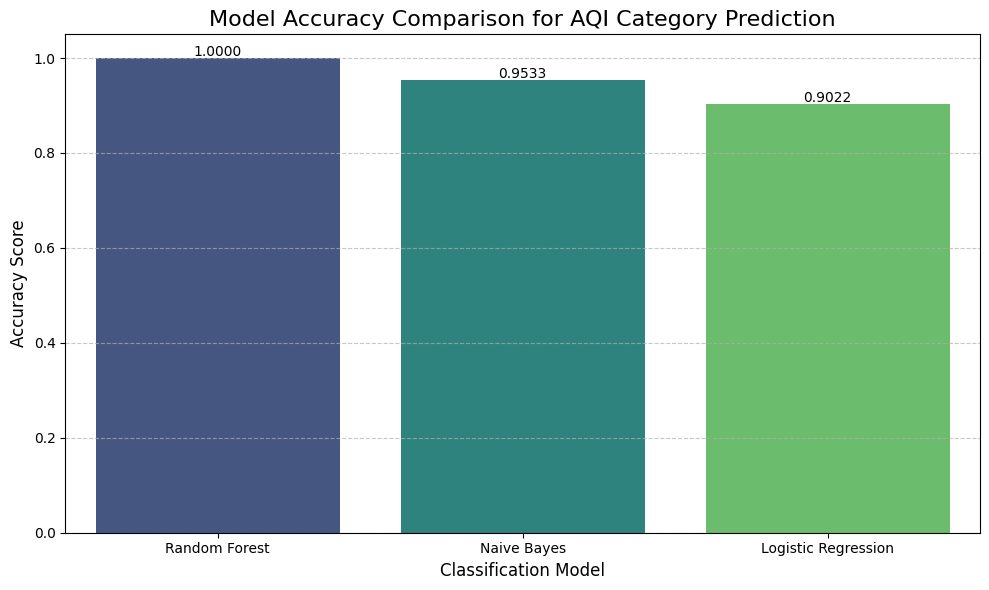

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# --- Load the new processed file ---
try:
    # Use the variable created in the previous step
    proc = pd.read_csv(PROCESSED_CSV)
    print("\n3. Data loaded for classification.")
except FileNotFoundError:
    print("\nFATAL ERROR: Could not load the processed CSV file even after re-running the pipeline.")
    raise

# --- Define features (X) and target (y) for classification ---
feature_cols = [
    'AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value',
    'avg_pollutant_aqi', 'max_pollutant_aqi', 'min_pollutant_aqi', 'pollutant_range'
]
X = proc[feature_cols]
y = proc['target']

# --- Split the data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train three classification models ---
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
nb_clf = GaussianNB()
lr_clf = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

models = {
    'Random Forest': rf_clf,
    'Naive Bayes': nb_clf,
    'Logistic Regression': lr_clf
}

accuracy_scores = {}

print("\n4. Training and Evaluating Classification Models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"  {name} Accuracy: {accuracy:.4f}")

# --- 5. Generate a bar graph comparing accuracy ---
df_accuracy = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='viridis')

# Add the accuracy values on top of the bars
for index, row in df_accuracy.iterrows():
    plt.text(row.name, row.Accuracy + 0.005, f'{row.Accuracy:.4f}',
             color='black', ha="center", fontsize=10)

plt.ylim(0, 1.05)
plt.title('Model Accuracy Comparison for AQI Category Prediction', fontsize=16)
plt.xlabel('Classification Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Week 9
# Cell 1: Re-Upload Original Data

from google.colab import files
import time
print("Please upload your original dataset file (e.g., 'global air pollution dataset.csv.xlsx') now.")
time.sleep(1) # Give the user a moment to read the instruction before the upload widget appears
uploaded = files.upload()
print("File uploaded successfully.")

Please upload your original dataset file (e.g., 'global air pollution dataset.csv.xlsx') now.


Saving global air pollution dataset.csv.xlsx to global air pollution dataset.csv.xlsx
File uploaded successfully.


In [ ]:
# Cell 2: Re-run essential Week 3 Processing

import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import numpy as np

# --- 1. Define Paths and Load Data ---
filename = list(uploaded.keys())[0]
INPUT_PATH = Path('/content') / filename
OUT_DIR = Path('/content/week3_submission')
OUT_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_CSV = OUT_DIR / (Path(INPUT_PATH).stem + '_week3_processed.csv')

# Load Data (Handling Excel/CSV)
if filename.endswith('.xlsx') or filename.endswith('.xls'):
    df = pd.read_excel(INPUT_PATH)
else:
    df = pd.read_csv(INPUT_PATH)
df.columns = [c.strip() for c in df.columns]

# --- 2. Data Cleaning (Handling Missing Values) ---
# Based on your previous steps, fill missing Country/City values
df["Country"] = df["Country"].fillna(df["Country"].mode()[0])
df["City"] = df["City"].fillna(df["City"].mode()[0])


# --- 3. Feature Engineering & Target Encoding (Simplified Week 3 Logic) ---
def find_pollutant_value_cols(columns):
    return [c for c in columns if 'AQI Value' in c and c != 'AQI Value']

def create_engineered_features(df, pollutant_cols):
    for c in pollutant_cols + (['AQI Value'] if 'AQI Value' in df.columns else []):
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    used = [c for c in pollutant_cols if c in df.columns]
    df['avg_pollutant_aqi'] = df[used].mean(axis=1)
    df['max_pollutant_aqi'] = df[used].max(axis=1)
    df['min_pollutant_aqi'] = df[used].min(axis=1)
    df['pollutant_range'] = df['max_pollutant_aqi'] - df['min_pollutant_aqi']
    return df

def encode_target(df):
    le = LabelEncoder()
    # Create the 'target' column by encoding 'AQI Category'
    df['target'] = le.fit_transform(df['AQI Category'].astype(str))
    return df

pollutant_cols = find_pollutant_value_cols(df.columns)
df = create_engineered_features(df, pollutant_cols)
df = encode_target(df)


# --- 4. Save the new processed file ---
df.to_csv(PROCESSED_CSV, index=False)
print(f"\nSUCCESS: Processed data saved to: {PROCESSED_CSV.name}")
print("You can now proceed to run the Week 5 analysis cells.")


SUCCESS: Processed data saved to: global air pollution dataset.csv_week3_processed.csv
You can now proceed to run the Week 5 analysis cells.


In [ ]:
# Cell 1: Setup, Data Loading, and Splitting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import time
from pathlib import Path

# --- Automated File Loading (Robust to name changes) ---
OUT_DIR = Path('/content/week3_submission')
processed_files = list(OUT_DIR.glob('*_week3_processed.csv'))

if not processed_files:
    raise FileNotFoundError("ERROR: Processed data not found. Run Week 3 steps first.")

proc = pd.read_csv(processed_files[0])
print(f"Data loaded from: {processed_files[0].name}")

# Define Features (X) and Target (y)
feature_cols = [
    'AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value',
    'avg_pollutant_aqi', 'max_pollutant_aqi', 'min_pollutant_aqi', 'pollutant_range'
]
X = proc[feature_cols]
y = proc['target']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data split complete.")

Data loaded from: global air pollution dataset.csv_week3_processed.csv
Data split complete.


In [ ]:
# Cell 2: Hyperparameter Tuning (Grid Search)

# Define a concise parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],      # Number of trees
    'max_depth': [10, 20],           # Max depth
    'min_samples_leaf': [1, 2],
}

rf_base = RandomForestClassifier(random_state=42)

# Run Grid Search (cv=3 for cross-validation)
print("Starting Grid Search for Optimal Parameters...")
start_time = time.time()
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
end_time = time.time()

# Store and report best model
rf_optimized = grid_search.best_estimator_

print(f"Grid Search Time: {end_time - start_time:.2f} seconds.")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

Starting Grid Search for Optimal Parameters...
Grid Search Time: 15.87 seconds.
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Best CV Accuracy: 0.9999



--- Final Evaluation ---
Test Set Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00      1846
           3       1.00      1.00      1.00       446
           4       1.00      1.00      1.00       318
           5       1.00      1.00      1.00        58

    accuracy                           1.00      4693
   macro avg       1.00      1.00      1.00      4693
weighted avg       1.00      1.00      1.00      4693



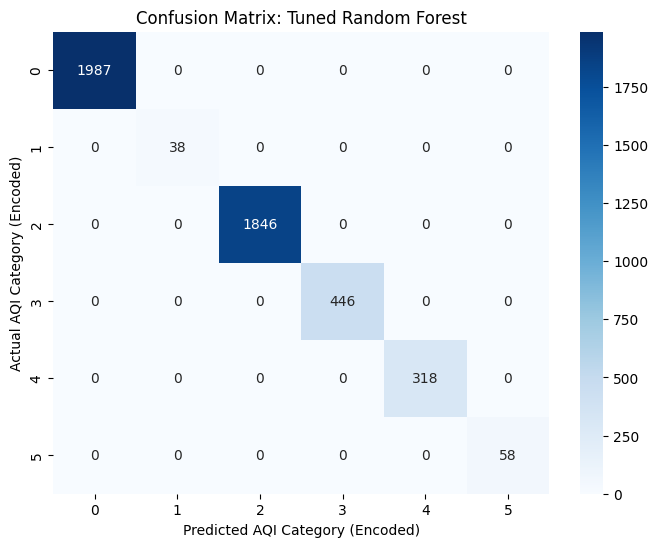

In [ ]:
# Cell 3: Final Evaluation and Confusion Matrix

# Predict on the Test Set using the optimized model
y_pred_tuned = rf_optimized.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("\n--- Final Evaluation ---")
print(f"Test Set Accuracy: {accuracy_tuned:.4f}")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))

unique_labels = sorted(y.unique()) # Use unique labels for axes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix: Tuned Random Forest')
plt.ylabel('Actual AQI Category (Encoded)')
plt.xlabel('Predicted AQI Category (Encoded)')
plt.show()

/tmp/ipython-input-2057823987.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index, palette="mako")


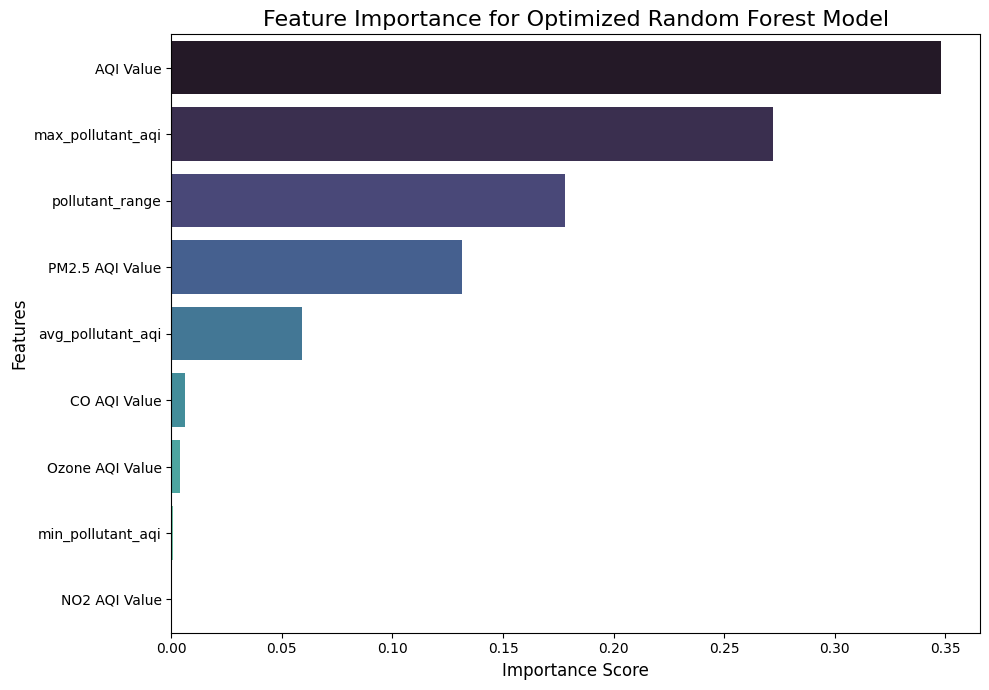

In [ ]:
#Feature Importance Visualization

# Get and sort feature importances
feature_importances = pd.Series(rf_optimized.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index, palette="mako")
plt.title('Feature Importance for Optimized Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()